Definition

K-Means is an unsupervised machine learning algorithm that groups data into k clusters. Each cluster has a centroid (the center point), and every data point belongs to the cluster with the nearest centroid.

How it works (Step by Step)

Choose k → Decide how many clusters you want.

Initialize centroids → Pick k random points as starting centroids.

Assign points → Each data point is assigned to the closest centroid (using a distance measure like Euclidean distance).

Update centroids → For each cluster, calculate the new centroid as the mean of all points in that cluster.

Repeat steps 3–4 until centroids stop changing much or a maximum number of iterations is reached.

**Importing all the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

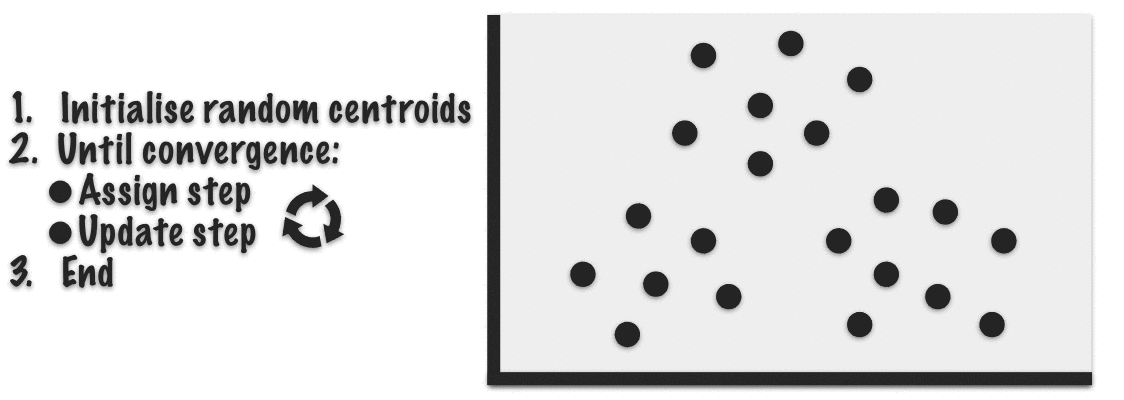

Data set loading

In [2]:
df=pd.read_csv("/content/wine-clustering.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Checking is their any null values in the data set

In [6]:
df.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


Standardization feature

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scalar=StandardScaler()

standar_df=scalar.fit_transform(df)

By using the elbow method finding the k value

inertia = []
Creates an empty list to store the inertia values for different cluster numbers.

K = range(1, 11)
Defines the range of possible cluster counts to test, from 1 cluster up to 10 clusters.

for k in K:
Loops through each possible number of clusters (k = 1, 2, …, 10).

km = KMeans(n_clusters=k, random_state=42)
Creates a KMeans model with k clusters.

random_state=42 is just for reproducibility (so results don’t change each time you run it).

km.fit(scaled_data)
Fits the KMeans model to your scaled dataset.
At this step, the algorithm assigns points to clusters and computes their centers.

inertia.append(km.inertia_)

km.inertia_ is the sum of squared distances of each point to its nearest cluster center (a measure of how compact the clusters are).

Lower inertia means tighter clusters.

We append it to the inertia list for later plotting.

In [9]:
inertia=[]
K=range(1,11)

for i in K:
  km=KMeans(n_clusters=i,random_state=42)
  km.fit(standar_df)
  inertia.append(km.inertia_)

Ploting elbow chart

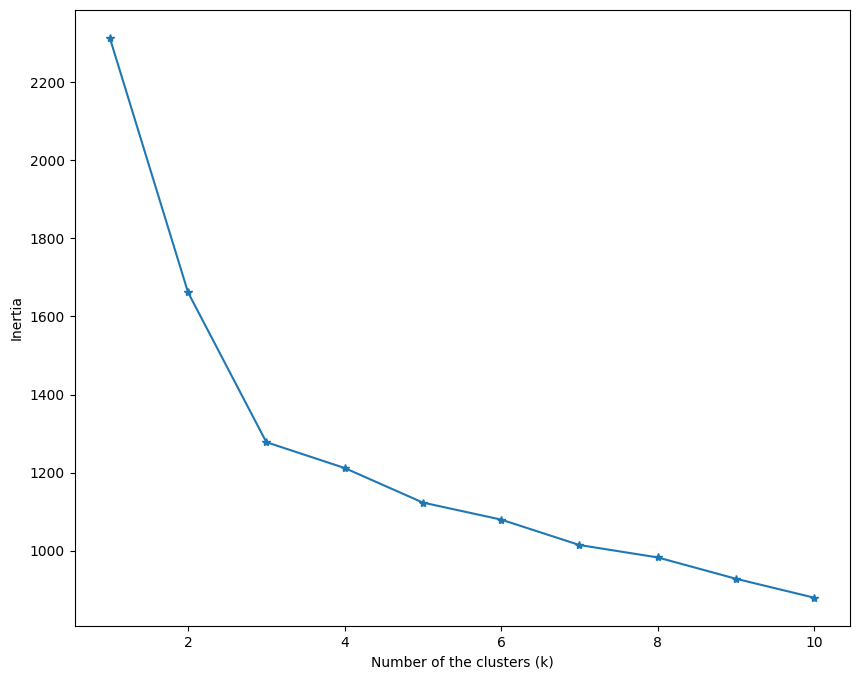

In [10]:
plt.figure(figsize=(10,8))
plt.plot(K,inertia,marker="*")
plt.xlabel("Number of the clusters (k)")
plt.ylabel("Inertia")
plt.show() #In the following cluster we can clearly see that the k value is "3"

We are going to call kmeans cluster and predicting the cluster column

In [11]:
Km=KMeans(n_clusters=3,random_state=42)
cluster=Km.fit_predict(standar_df)

Adding cluster column to data set df

In [12]:
df["cluster"]=cluster

In [13]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


Cluster 0 wines tend to have high alcohol and flavonoids.

Cluster 1 wines have lower magnesium and color intensity.

Cluster 2 wines are richer in proline.

In [14]:
df["cluster"].unique()

array([2, 0, 1], dtype=int32)

In [15]:
df["cluster"].value_counts()

,count
cluster,
0,65
2,62
1,51
